In [35]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from ltu_ili_testing import SBI_Fitter
import numpy as np
import torch
from synthesizer.emission_models import PacmanEmission, TotalEmission, EmissionModel, IntrinsicEmission
from synthesizer.emission_models.attenuation import PowerLaw, Calzetti2000
from synthesizer.grid import Grid
from synthesizer.parametric import SFH, ZDist
from synthesizer.instruments import Instrument, FilterCollection, Filter
from unyt import Myr, erg, Hz, s
from astropy.cosmology import Planck18
from astropy import units as u


grid_path = '/home/tharvey/work/output/grid_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1.hdf5'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
fitter = SBI_Fitter.init_from_hdf5('Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe', 
                                grid_path, return_output=False)

fitter.create_feature_array_from_raw_photometry(extra_features=[], normalize_method=None);

---------------------------------------------
Features: 100000 features over 20 samples
---------------------------------------------
Feature: Min - Max
---------------------------------------------
NIRCam.F070W: 21.384 - 50.000 AB
NIRCam.F090W: 19.759 - 50.000 AB
NIRCam.F115W: 19.533 - 50.000 AB
NIRCam.F140M: 19.640 - 50.000 AB
NIRCam.F150W: 19.666 - 42.887 AB
NIRCam.F162M: 19.382 - 41.489 AB
NIRCam.F182M: 19.386 - 41.191 AB
NIRCam.F200W: 19.375 - 41.193 AB
NIRCam.F210M: 19.360 - 41.262 AB
NIRCam.F250M: 19.415 - 40.193 AB
NIRCam.F277W: 19.419 - 39.720 AB
NIRCam.F300M: 19.431 - 39.453 AB
NIRCam.F335M: 18.688 - 39.107 AB
NIRCam.F356W: 19.162 - 38.960 AB
NIRCam.F360M: 18.896 - 38.955 AB
NIRCam.F410M: 19.350 - 38.677 AB
NIRCam.F430M: 18.503 - 38.605 AB
NIRCam.F444W: 19.162 - 38.420 AB
NIRCam.F460M: 18.377 - 38.405 AB
NIRCam.F480M: 19.062 - 38.008 AB
---------------------------------------------


Let's set up a 6 network model ensemble with both MDN and MAF models, with a range of hidden features. 


Notes

Learning rate 1e-5 took ~8 hours to train all nets, typically >1000 epochs each  
1e-3 took ~ 1 hour, typically ~200 epochs each

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 2.


Splitting dataset with 100000 samples into training and testing sets with 0.80 train fraction.
---------------------------------------------
Prior ranges:
---------------------------------------------
redshift: 5.00 - 12.00
log_mass: 6.00 - 11.50
sps_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1/tau_v: 0.00 - 2.00
sps_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1/tau: 0.05 - 2.50
sps_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1/peak_age: 0.00 - 990.40
sps_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1/log10metallicity: -3.00 - -1.39
---------------------------------------------
Creating mdn network with NPE engine and lampe backend.
     hidden_features: 50
     num_components: 5
Creating mdn network with NPE engine and lampe backend.
     hidden_features: 75
     num_components: 5
IndependentUniform(Uniform(low: torch.Size([6]), high: torch.Size([6])), 1)
[2025-05-15 15:23:10,322] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto

216 epochs [07:25,  2.06s/ epochs, loss=-1.13, loss_val=-1.51]    
INFO:root:Training model 2 / 2.
264 epochs [09:03,  2.06s/ epochs, loss=-2.08, loss_val=-2.31]  
INFO:root:It took 989.0812509059906 seconds to train models.
INFO:root:Saving model to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe
INFO:root:Sampling models with [306, 694] samples each.


Time to train model(s): 0:16:29.095395


Drawing 306 posterior samples: 530it [00:00, 76132.10it/s]            
Drawing 694 posterior samples: 1256it [00:00, 622626.86it/s]          
INFO:root:Saving single posterior plot to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe/plots/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe_35834_plot_single_posterior.jpg...
100%|██████████| 20000/20000 [01:03<00:00, 316.48it/s]
INFO:root:Saving coverage plot to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe/plots/plot_coverage.jpg...
INFO:root:Saving ranks histogram to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe/plots/ranks_histogram.jpg...
INFO:root:Mean logprob: 1.1488e+00Median logprob: 1.7231e+00
INFO:root:Saving true logprobs to /home/tharvey/work/ltu-ili_testing/models/Pop

(LampeEnsemble(
   (posteriors): ModuleList(
     (0): LampeNPE(
       (nde): NPE(
         (flow): GMM(
           (hyper): MLP(
             (0): Linear(in_features=20, out_features=50, bias=True)
             (1): ReLU()
             (2): Linear(in_features=50, out_features=50, bias=True)
             (3): ReLU()
             (4): Linear(in_features=50, out_features=50, bias=True)
             (5): ReLU()
             (6): Linear(in_features=50, out_features=140, bias=True)
           )
         )
       )
       (embedding_net): Identity()
     )
     (1): LampeNPE(
       (nde): NPE(
         (flow): GMM(
           (hyper): MLP(
             (0): Linear(in_features=20, out_features=75, bias=True)
             (1): ReLU()
             (2): Linear(in_features=75, out_features=75, bias=True)
             (3): ReLU()
             (4): Linear(in_features=75, out_features=75, bias=True)
             (5): ReLU()
             (6): Linear(in_features=75, out_features=140, bias=True)
    

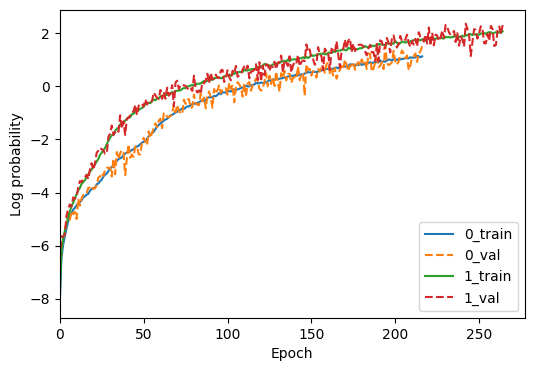

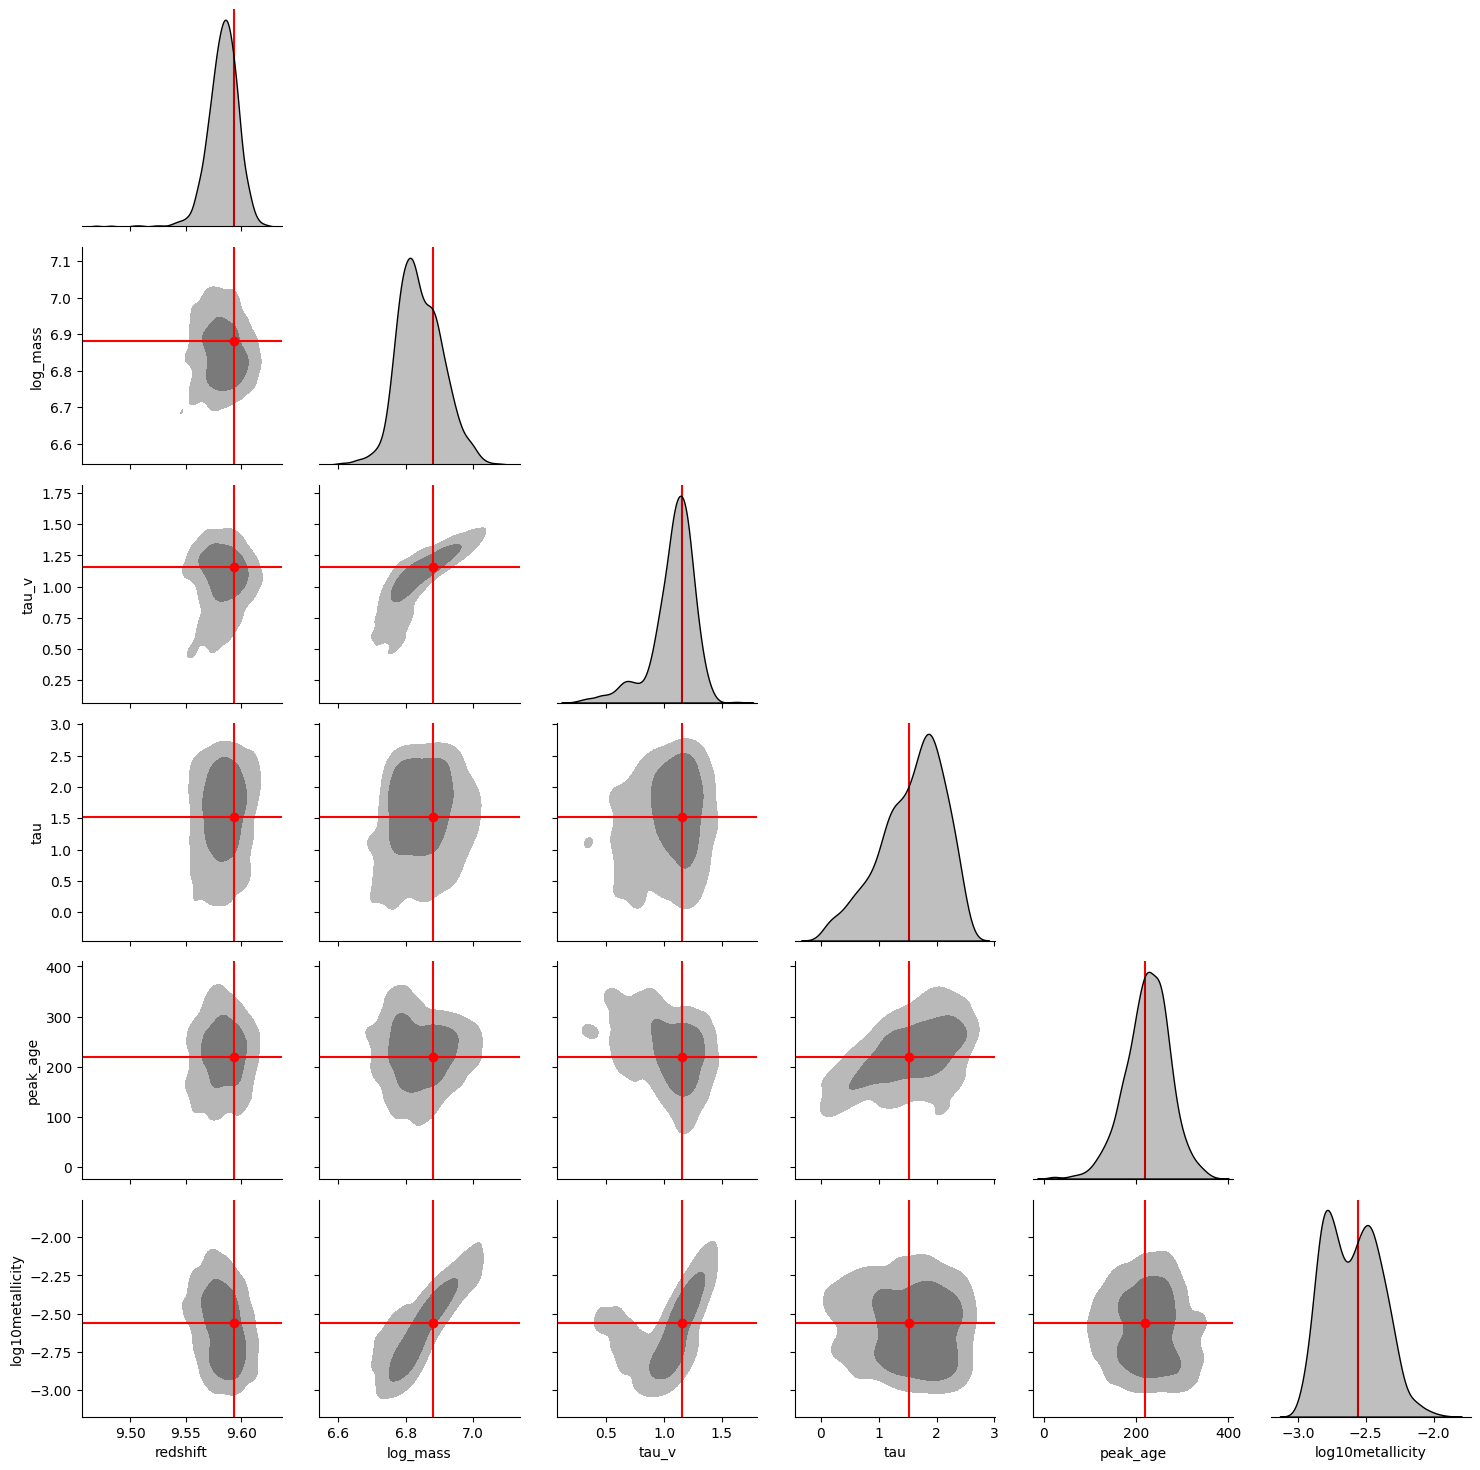

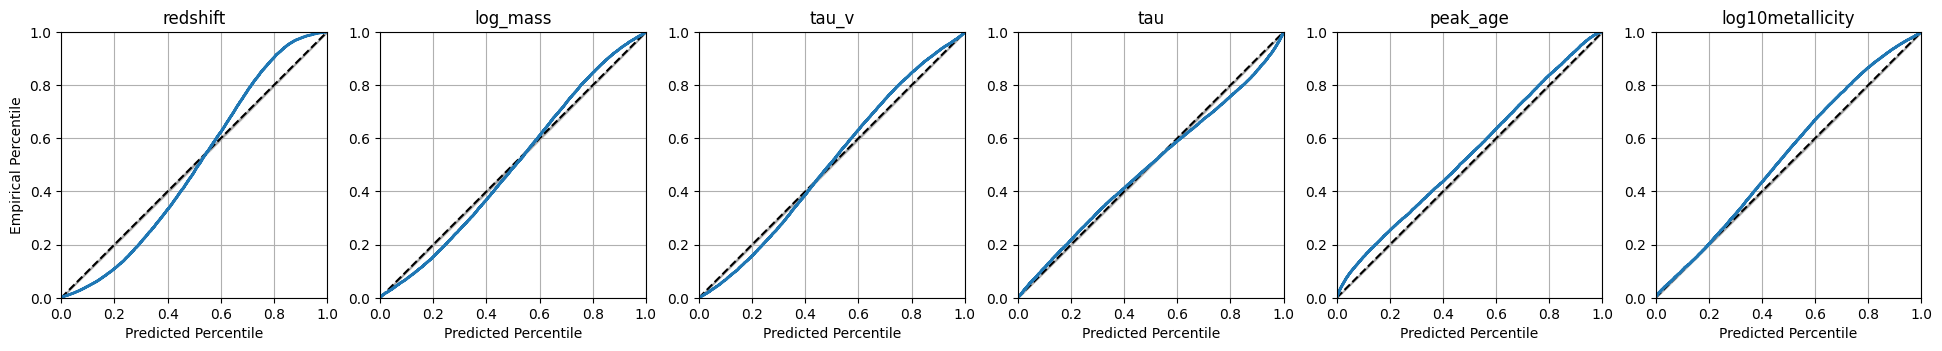

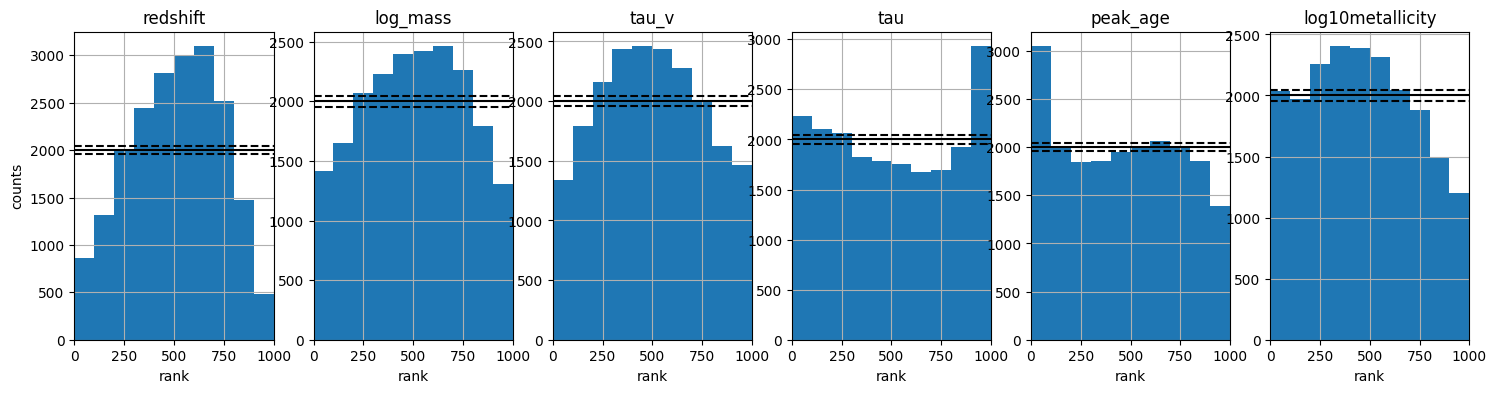

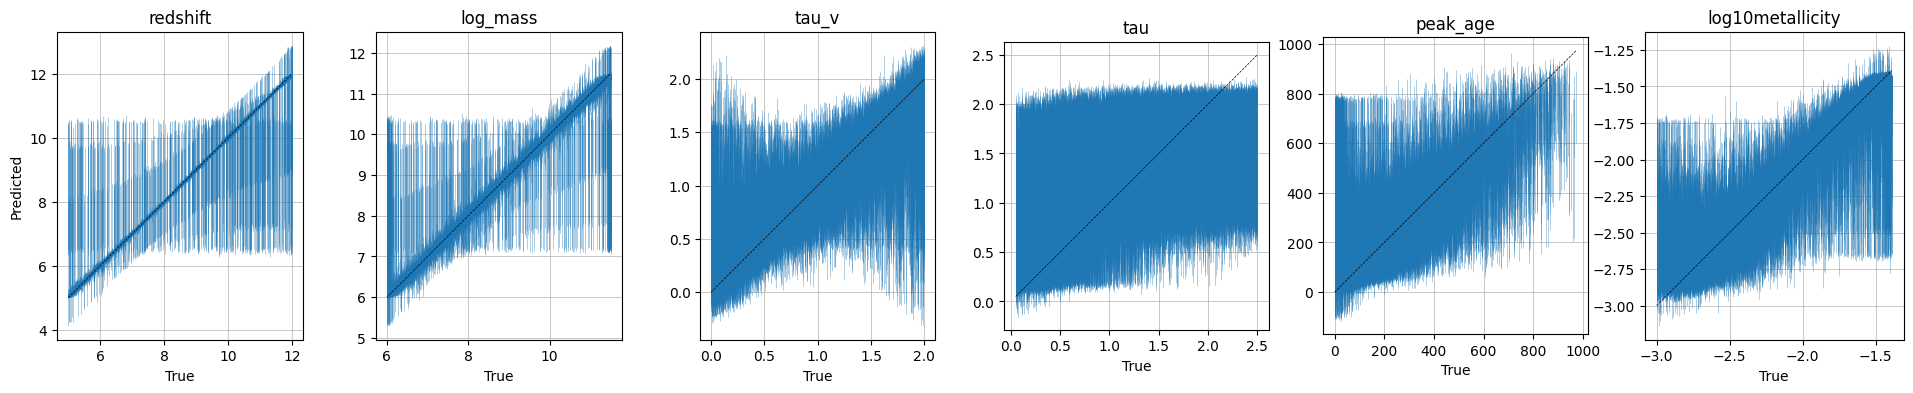

INFO:matplotlib.mathtext:Substituting symbol E from STIXNonUnicode


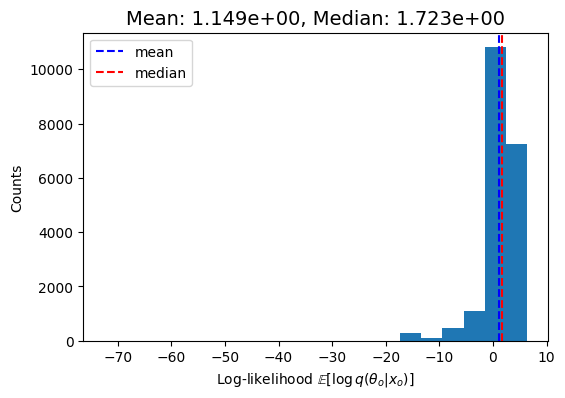

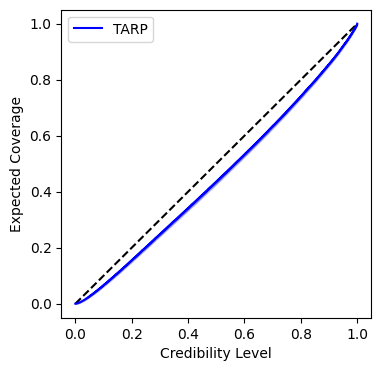

In [6]:
fitter.run_single_sbi(n_nets=2,
                    backend='lampe',
                    engine='NPE', 
                    stop_after_epochs=20, 
                    hidden_features=[50, 75],
                    learning_rate=1e-3,
                    num_transforms=5,
                    num_components=5,
                    model_type=['mdn', 'mdn'])

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 2.


---------------------------------------------
Features: 100000 features over 20 samples
---------------------------------------------
Feature: Min - Max
---------------------------------------------
NIRCam.F070W: 21.384 - 50.000 AB
NIRCam.F090W: 19.759 - 50.000 AB
NIRCam.F115W: 19.533 - 50.000 AB
NIRCam.F140M: 19.640 - 50.000 AB
NIRCam.F150W: 19.666 - 42.887 AB
NIRCam.F162M: 19.382 - 41.489 AB
NIRCam.F182M: 19.386 - 41.191 AB
NIRCam.F200W: 19.375 - 41.193 AB
NIRCam.F210M: 19.360 - 41.262 AB
NIRCam.F250M: 19.415 - 40.193 AB
NIRCam.F277W: 19.419 - 39.720 AB
NIRCam.F300M: 19.431 - 39.453 AB
NIRCam.F335M: 18.688 - 39.107 AB
NIRCam.F356W: 19.162 - 38.960 AB
NIRCam.F360M: 18.896 - 38.955 AB
NIRCam.F410M: 19.350 - 38.677 AB
NIRCam.F430M: 18.503 - 38.605 AB
NIRCam.F444W: 19.162 - 38.420 AB
NIRCam.F460M: 18.377 - 38.405 AB
NIRCam.F480M: 19.062 - 38.008 AB
---------------------------------------------
Splitting dataset with 100000 samples into training and testing sets with 0.80 train fraction.


169 epochs [10:32,  3.74s/ epochs, loss=-2.98, loss_val=-2.87]   
INFO:root:Training model 2 / 2.
168 epochs [07:27,  2.67s/ epochs, loss=-2.73, loss_val=-1.82]   
INFO:root:It took 1080.6295387744904 seconds to train models.
INFO:root:Saving model to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe_maf
INFO:root:Sampling models with [621, 379] samples each.


Time to train model(s): 0:18:00.645276


Drawing 621 posterior samples: 773it [00:00, 77776.64it/s]            
Drawing 379 posterior samples: 445it [00:00, 71528.52it/s]            
INFO:root:Saving single posterior plot to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe_maf/plots/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe_maf_76007_plot_single_posterior.jpg...
100%|██████████| 20000/20000 [05:27<00:00, 61.13it/s]
INFO:root:Saving coverage plot to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe_maf/plots/plot_coverage.jpg...
INFO:root:Saving ranks histogram to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe_maf/plots/ranks_histogram.jpg...
INFO:root:Mean logprob: -2.6414e+00Median logprob: 1.6430e+00
INFO:root:Saving true logprobs to /home/tharvey/work/ltu-ili_te

(LampeEnsemble(
   (posteriors): ModuleList(
     (0): LampeNPE(
       (nde): NPE(
         (flow): MAF(
           (transform): LazyComposedTransform(
             (0): MaskedAutoregressiveTransform(
               (base): MonotonicAffineTransform()
               (order): [0, 1, 2, 3, 4, 5]
               (hyper): MaskedMLP(
                 (0): MaskedLinear(in_features=26, out_features=50, bias=True)
                 (1): ReLU()
                 (2): MaskedLinear(in_features=50, out_features=50, bias=True)
                 (3): ReLU()
                 (4): MaskedLinear(in_features=50, out_features=12, bias=True)
               )
             )
             (1): MaskedAutoregressiveTransform(
               (base): MonotonicAffineTransform()
               (order): [5, 4, 3, 2, 1, 0]
               (hyper): MaskedMLP(
                 (0): MaskedLinear(in_features=26, out_features=50, bias=True)
                 (1): ReLU()
                 (2): MaskedLinear(in_features=50, out_fea

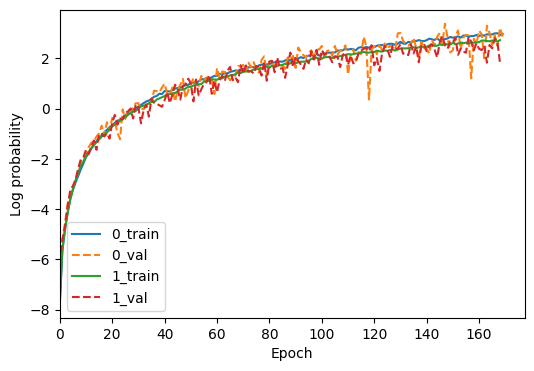

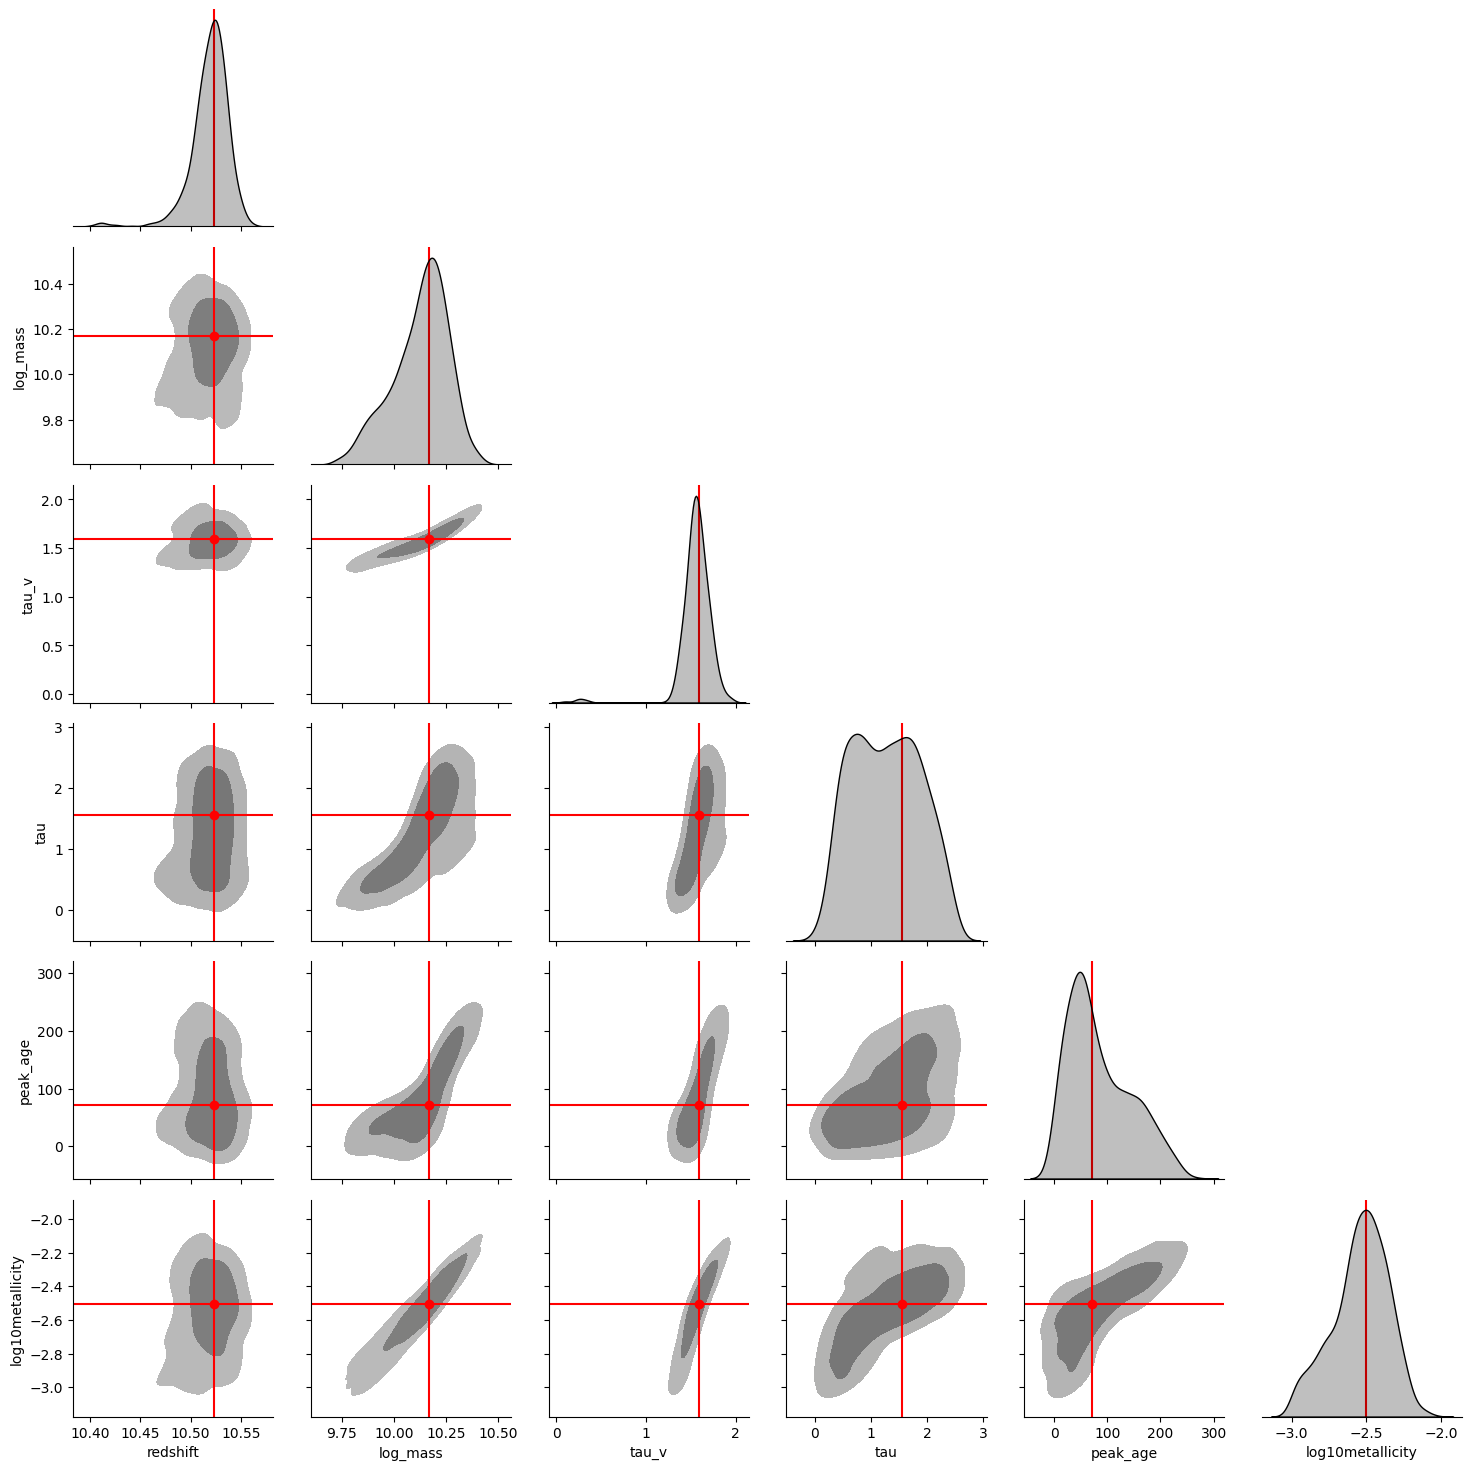

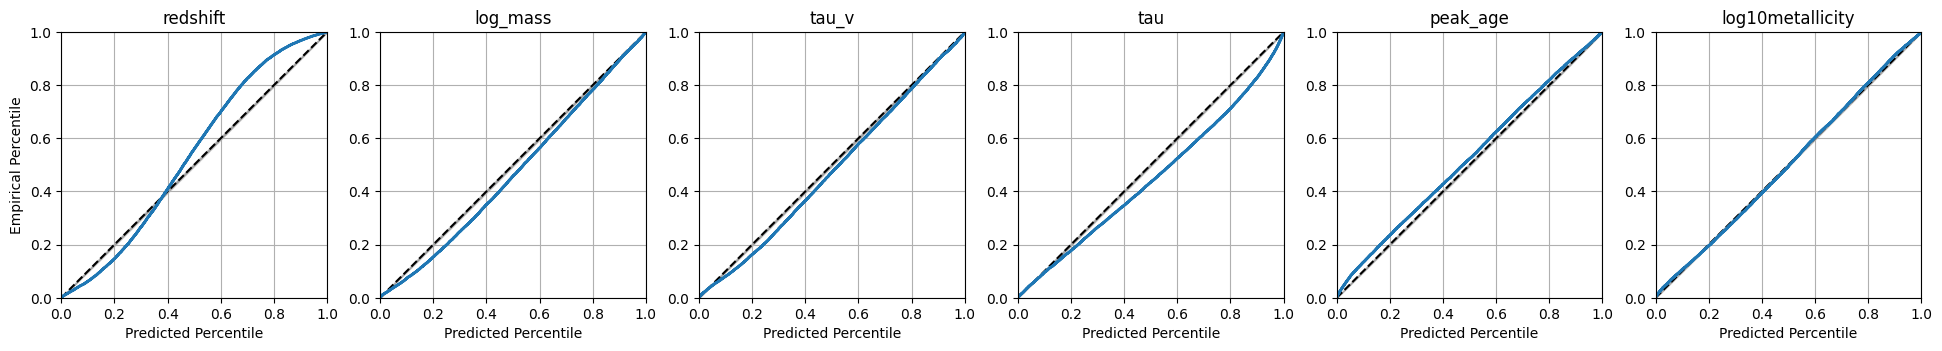

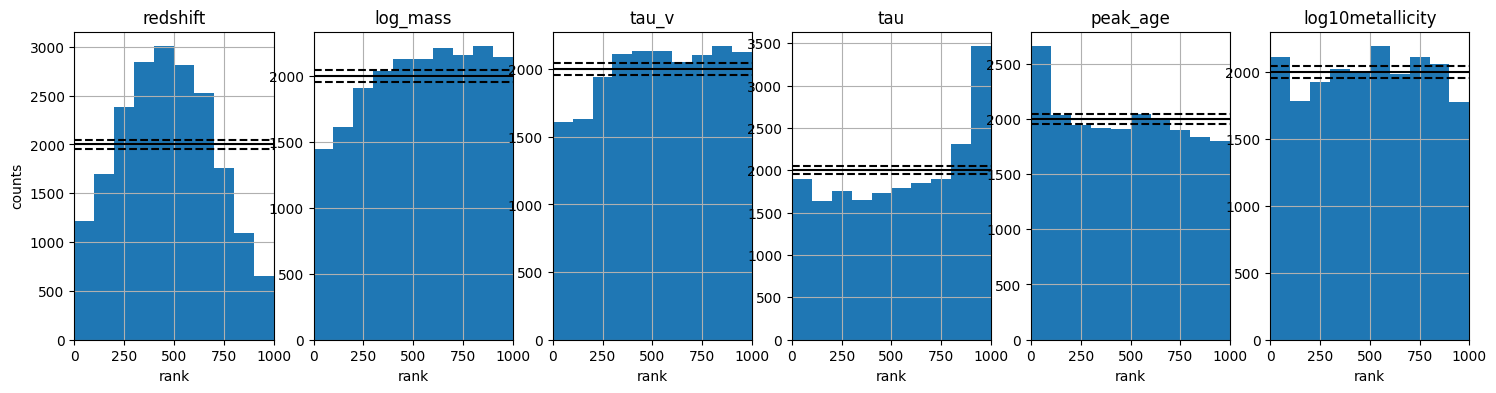

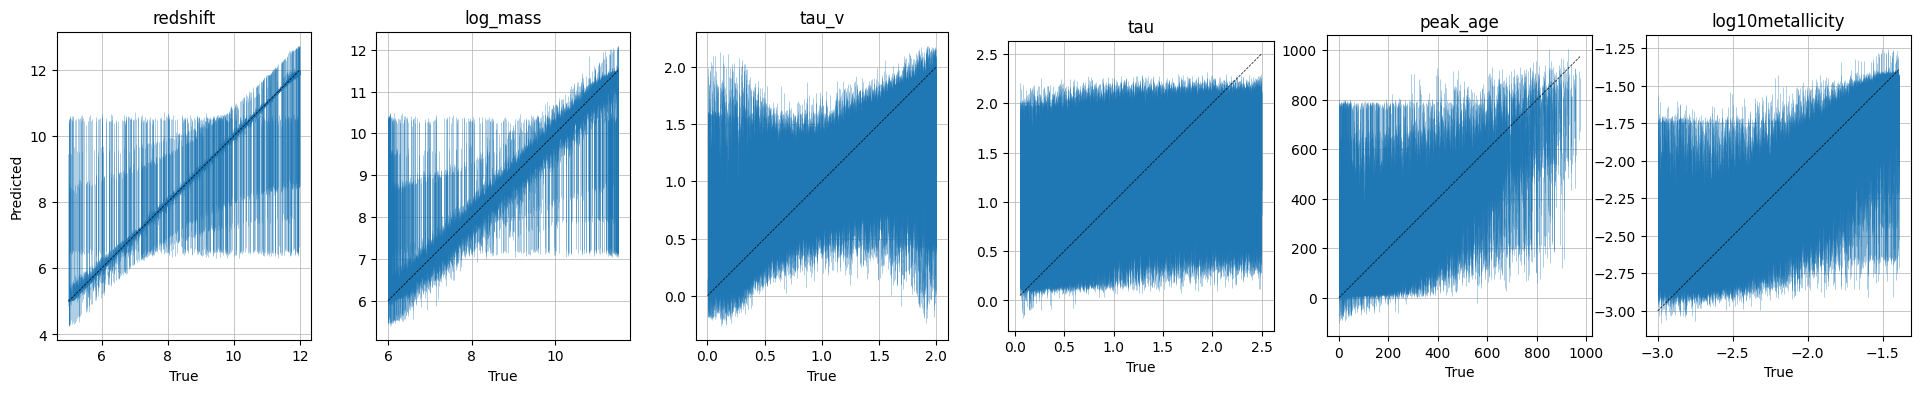

INFO:matplotlib.mathtext:Substituting symbol E from STIXNonUnicode


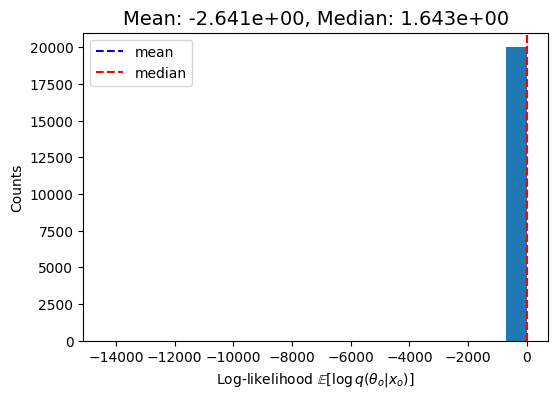

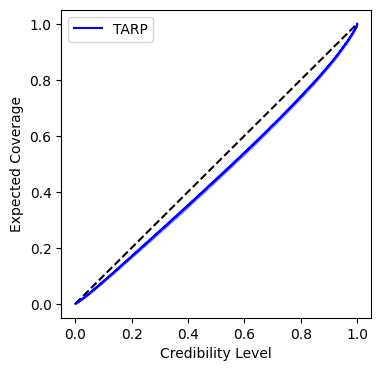

In [7]:
fitter = SBI_Fitter.init_from_hdf5('Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_lampe_maf', 
                                grid_path, return_output=False)

fitter.create_feature_array_from_raw_photometry(extra_features=[], normalize_method=None);

fitter.run_single_sbi(n_nets=2,
                    backend='lampe',
                    engine='NPE', 
                    stop_after_epochs=20, 
                    hidden_features=[50, 75],
                    learning_rate=1e-3,
                    num_transforms=[5, 3],
                    model_type=['maf', 'maf'])

Setup  a simulator so we can try and recreate the SED

In [161]:
from ltu_ili_testing import GalaxySimulator


grid_dir = '/home/tharvey/work/synthesizer_grids/'
grid_name = 'bpass-2.2.1-bin_chabrier03-0.1,300.0_cloudy-c23.01-sps.hdf5'

grid = Grid(
    grid_name,
    grid_dir=grid_dir,
)

filter_codes = [
    "JWST/NIRCam.F070W", "JWST/NIRCam.F090W", "JWST/NIRCam.F115W", "JWST/NIRCam.F140M",
    "JWST/NIRCam.F150W", "JWST/NIRCam.F162M", "JWST/NIRCam.F182M", "JWST/NIRCam.F200W",
    "JWST/NIRCam.F210M", "JWST/NIRCam.F250M", "JWST/NIRCam.F277W", "JWST/NIRCam.F300M",
    "JWST/NIRCam.F335M", "JWST/NIRCam.F356W", "JWST/NIRCam.F360M", "JWST/NIRCam.F410M",
    "JWST/NIRCam.F430M", "JWST/NIRCam.F444W", "JWST/NIRCam.F460M", "JWST/NIRCam.F480M",
]
filterset = FilterCollection(filter_codes)
instrument = Instrument('JWST', filters=filterset)

sfh = SFH.LogNormal
zdist = ZDist.DeltaConstant

priors = {
    'redshift': (5.0, 10.0),
    'log_mass': (7.0, 10.0),
    'log10metallicity': (-3.0, 0.3),
    'tau_v': (0.0, 1.5),
    'peak_age': (0, 500),
    'max_age': (500, 1000),
    'tau': (0.3, 1.5)
}

emission_model = TotalEmission(
    grid=grid,
    fesc=0.1,
    fesc_ly_alpha=0.1,
    dust_curve=Calzetti2000(), 
    dust_emission_model=None,
)

# This tells the emission model we will have a parameter called 'tau_v' on the stellar emitter.
emitter_params = {'stellar':['tau_v']}


simulator = GalaxySimulator(
    sfh_model=sfh,
    zdist_model=zdist,
    grid=grid,
    instrument=instrument,
    emission_model=emission_model,
    emission_model_key='total',
    emitter_params=emitter_params,
    param_units = {'peak_age':Myr, 'max_age':Myr},
    normalize_method=None,
    output_type=['photo_fnu', 'fnu'],
    out_flux_unit='ABmag',
)

We're not fitting for max_age, but we need it to recreate the SFH. Here we write a function to calculate it from the other parameters. This could also be used to margnalize over unfitted parameters e.g. metallicity, but we are not doing that here.

In [33]:
marginalized_parameters = {}


def max_age_from_z(params, max_redshift=20, cosmo=Planck18):
    redshift = params['redshift']
    max_age = (cosmo.age(redshift) - cosmo.age(max_redshift)).to(u.Myr).value
    return max_age

marginalized_parameters['max_age'] = max_age_from_z

    

In [119]:
# Pick some random photometry

index = np.random.choice(fitter._test_indices)
params = fitter.feature_array[index, :].copy()

params

array([5.0000000e+01, 5.0000000e+01, 2.7495916e+01, 2.6874561e+01,
       2.6740543e+01, 2.6600147e+01, 2.6513451e+01, 2.6420214e+01,
       2.6350885e+01, 2.5857412e+01, 2.5577501e+01, 2.5287037e+01,
       2.4380451e+01, 2.4238869e+01, 2.4176817e+01, 2.4005953e+01,
       2.3960987e+01, 2.3906471e+01, 2.3823742e+01, 2.3780493e+01,
       3.6448377e-01, 1.3486205e+00, 8.5682059e-03, 4.8552230e-03,
       4.2942022e-03, 3.7755808e-03, 3.4869844e-03, 3.2010919e-03,
       3.0037656e-03, 1.9090816e-03, 1.4759657e-03, 1.1299618e-03,
       4.9062463e-04, 4.3067147e-04, 4.0675979e-04, 3.4755343e-04,
       3.3345897e-04, 3.1713484e-04, 2.9387613e-04, 2.8240349e-04],
      dtype=float32)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 14


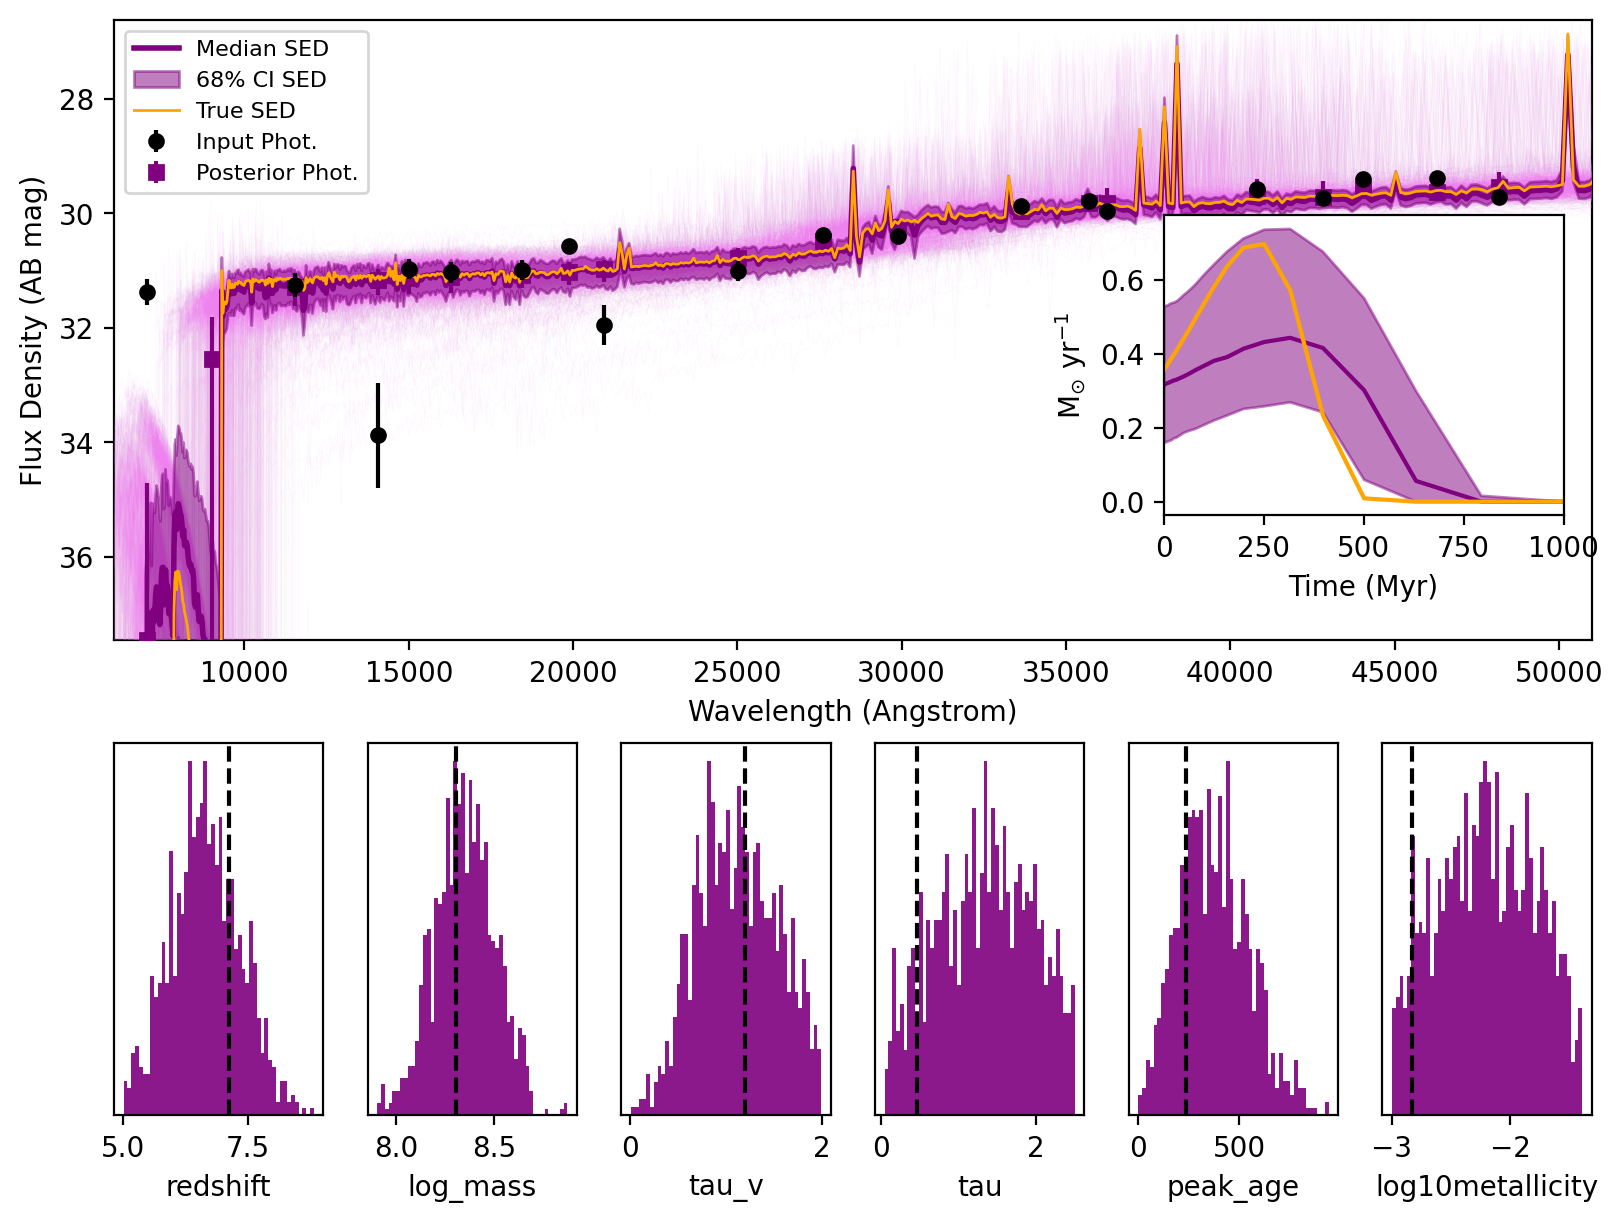

In [227]:
%matplotlib inline

fig = fitter.recover_SED(X_test=params,
                    simulator=simulator,
                    marginalized_parameters=marginalized_parameters,
                    true_parameters=fitter.fitted_parameter_array[index, :],
)

fig

In [219]:
for i in range(10):

    index = np.random.choice(fitter._test_indices)
    params = fitter.feature_array[index, :].copy()
    
    fig = fitter.recover_SED(X_test=params,
                        simulator=simulator,
                        marginalized_parameters=marginalized_parameters,
                        true_parameters=fitter.fitted_parameter_array[index, :],
                        plot_name=f'recovered_sed_{index}.png',
    )
    plt.show()


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 0


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 46


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 7


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 1


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 40


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 57


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 1


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 37


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 0


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of NaN SFH: 13


Train a noisy model

Scattering photometry 5 times for each row
['unc_NIRCam.F070W', 'unc_NIRCam.F090W', 'unc_NIRCam.F115W', 'unc_NIRCam.F140M', 'unc_NIRCam.F150W', 'unc_NIRCam.F162M', 'unc_NIRCam.F182M', 'unc_NIRCam.F200W', 'unc_NIRCam.F210M', 'unc_NIRCam.F250M', 'unc_NIRCam.F277W', 'unc_NIRCam.F300M', 'unc_NIRCam.F335M', 'unc_NIRCam.F356W', 'unc_NIRCam.F360M', 'unc_NIRCam.F410M', 'unc_NIRCam.F430M', 'unc_NIRCam.F444W', 'unc_NIRCam.F460M', 'unc_NIRCam.F480M']
---------------------------------------------
Features: 500000 features over 40 samples
---------------------------------------------
Feature: Min - Max
---------------------------------------------
NIRCam.F070W: 21.384 - 50.000 AB
NIRCam.F090W: 19.759 - 50.000 AB
NIRCam.F115W: 19.533 - 50.000 AB
NIRCam.F140M: 19.640 - 50.000 AB
NIRCam.F150W: 19.666 - 50.000 AB
NIRCam.F162M: 19.382 - 50.000 AB
NIRCam.F182M: 19.386 - 50.000 AB
NIRCam.F200W: 19.375 - 50.000 AB
NIRCam.F210M: 19.360 - 50.000 AB
NIRCam.F250M: 19.415 - 50.000 AB
NIRCam.F277W: 19.419 - 50.0

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 1.


---------------------------------------------
Prior ranges:
---------------------------------------------
redshift: 5.00 - 12.00
log_mass: 6.00 - 11.50
sps_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1/tau_v: 0.00 - 2.00
sps_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1/tau: 0.05 - 2.50
sps_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1/peak_age: 0.00 - 990.40
sps_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1/log10metallicity: -3.00 - -1.39
---------------------------------------------
Creating maf network with NPE engine and sbi backend.
     hidden_features: 75
     num_transforms: 3
 Training neural network. Epochs trained: 144

INFO:root:It took 2188.0749781131744 seconds to train models.
INFO:root:Saving model to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_sbi_noisy


 Neural network successfully converged after 145 epochs.Time to train model(s): 0:36:28.156866


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:root:Saving single posterior plot to /home/tharvey/work/ltu-ili_testing/models/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_sbi_noisy/plots/Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_sbi_noisy_333372_plot_single_posterior.jpg...
 17%|█▋        | 17285/100000 [02:04<09:53, 139.25it/s]WARNING:root:Only 0.031% proposal samples are
                    accepted. It may take a long time to collect the remaining
                    -6 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
 33%|███▎      | 33425/100000 [04:01<07:57, 139.38it/s]WARNING:root:Only 0.510% proposal samples are
                    accepted. It may take a long time to collect the remaining
                    -17 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
 45%|████▍     | 44761/100000 [05:24<06:36, 139.29it/

(EnsemblePosterior sampler for potential_fn=<EnsemblePotential>,
 [{'epochs_trained': [0, 145],
   'best_validation_loss': [inf, 4.277585297584534],
   'validation_loss': [8.34910220527649,
    8.02653322982788,
    7.431314205932617,
    7.5823175281524655,
    7.26789469871521,
    6.965436867523193,
    7.337587218475342,
    6.491759297943116,
    6.410644533538818,
    6.717321772766113,
    6.306722667312622,
    6.510887997055054,
    6.100550256729126,
    6.334151924133301,
    6.196181287765503,
    6.023307379150391,
    6.339318473052979,
    6.0953268009185795,
    6.293173831558228,
    6.084699956512451,
    5.80496729850769,
    6.814457028579712,
    5.88221876373291,
    5.986635818481445,
    5.605694036865234,
    5.623086263656616,
    5.662201456069946,
    5.854835904121399,
    5.633976200675964,
    5.589607488441468,
    5.9264090259552,
    5.419483106994629,
    5.534456834983826,
    5.430418170166016,
    5.539267959594727,
    5.410087920761108,
    5.768

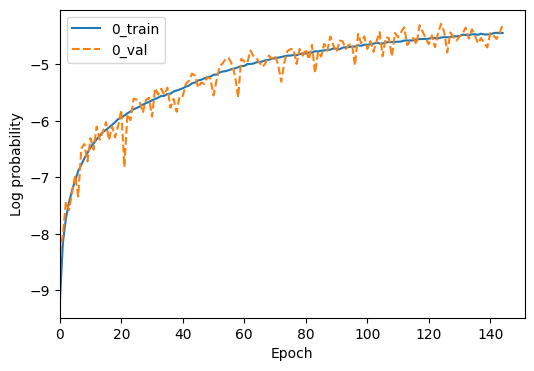

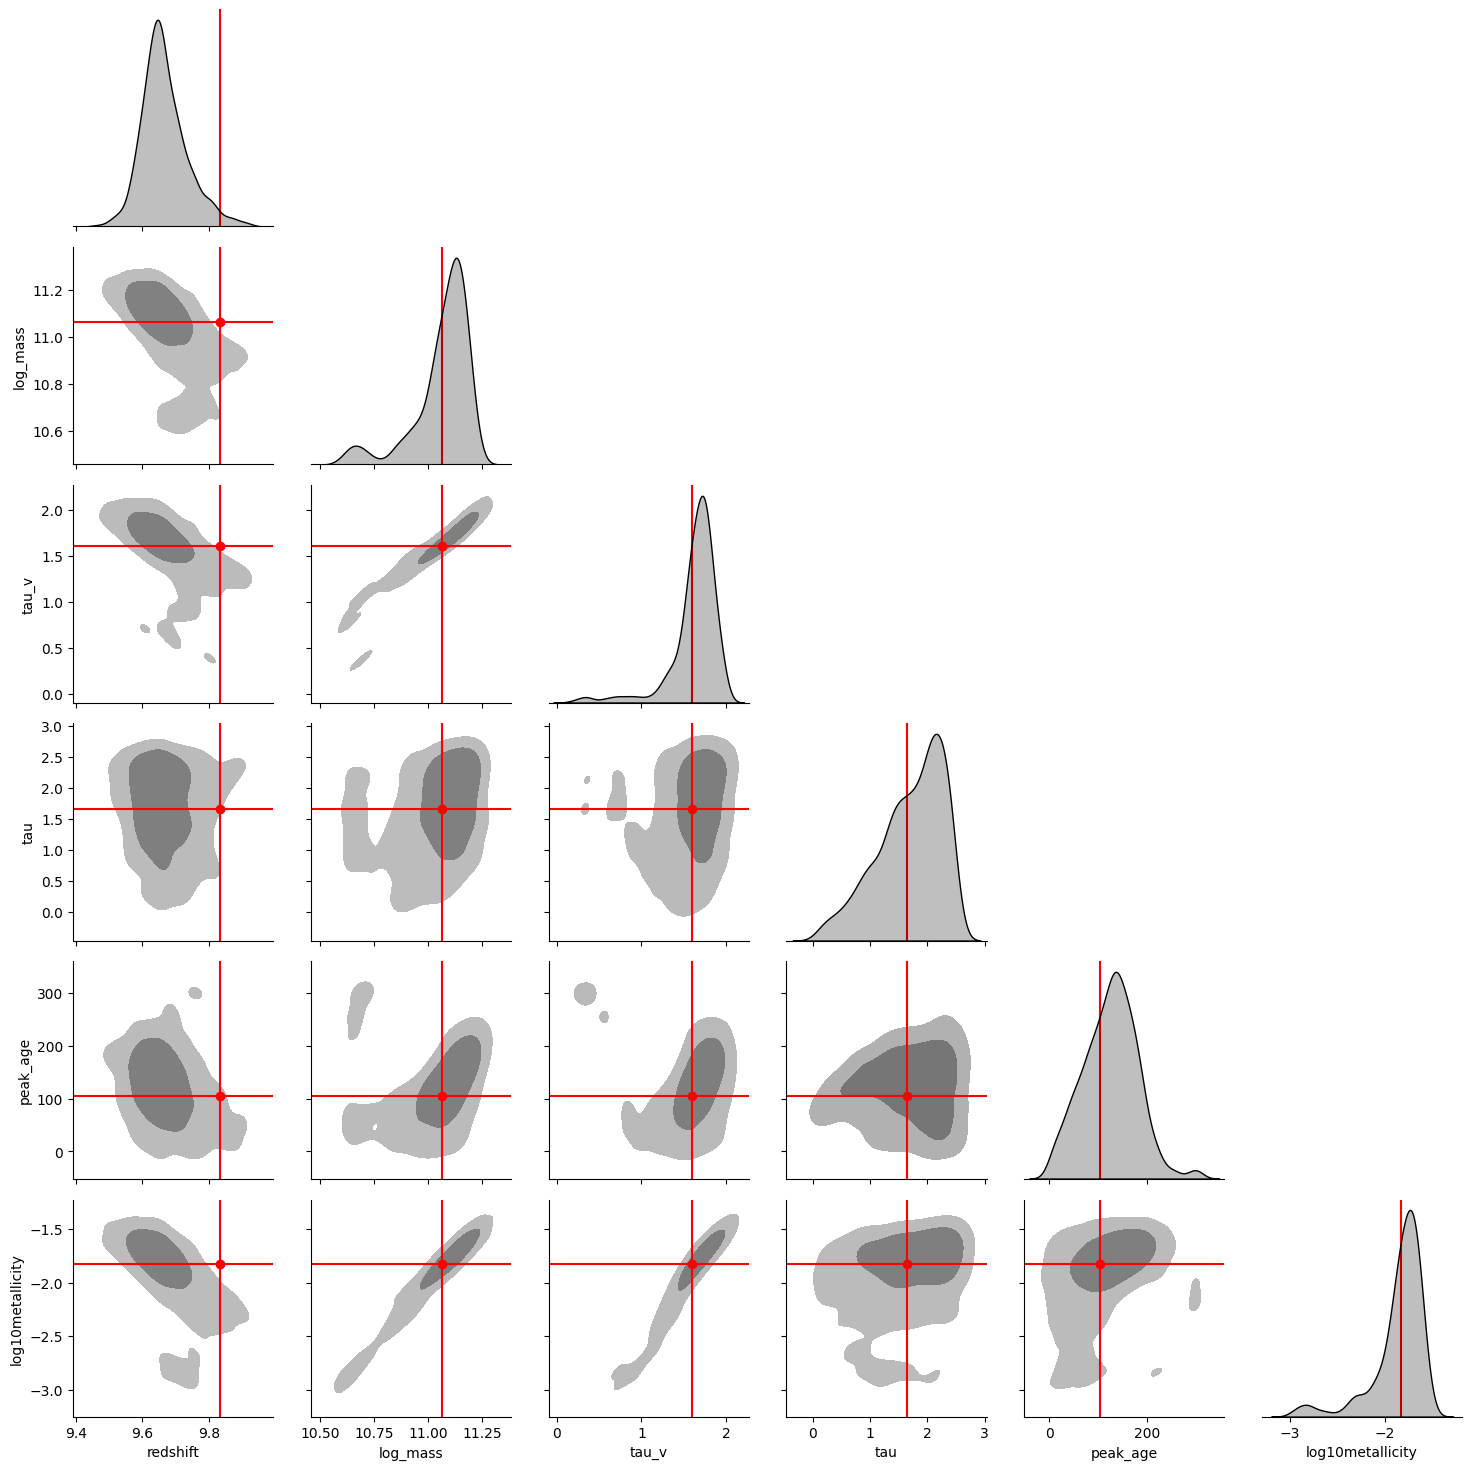

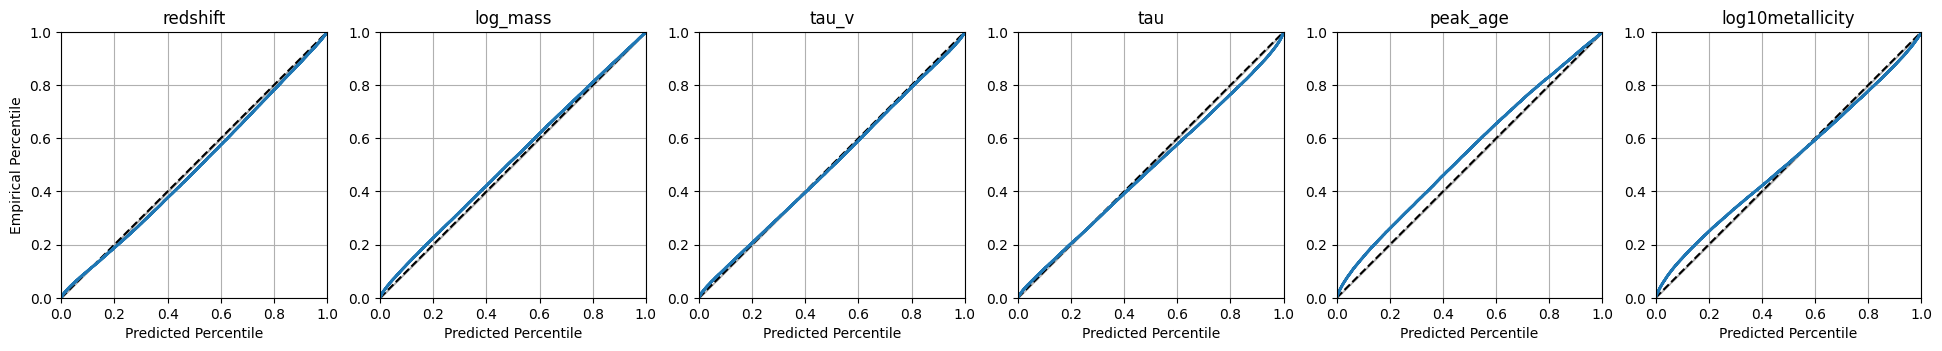

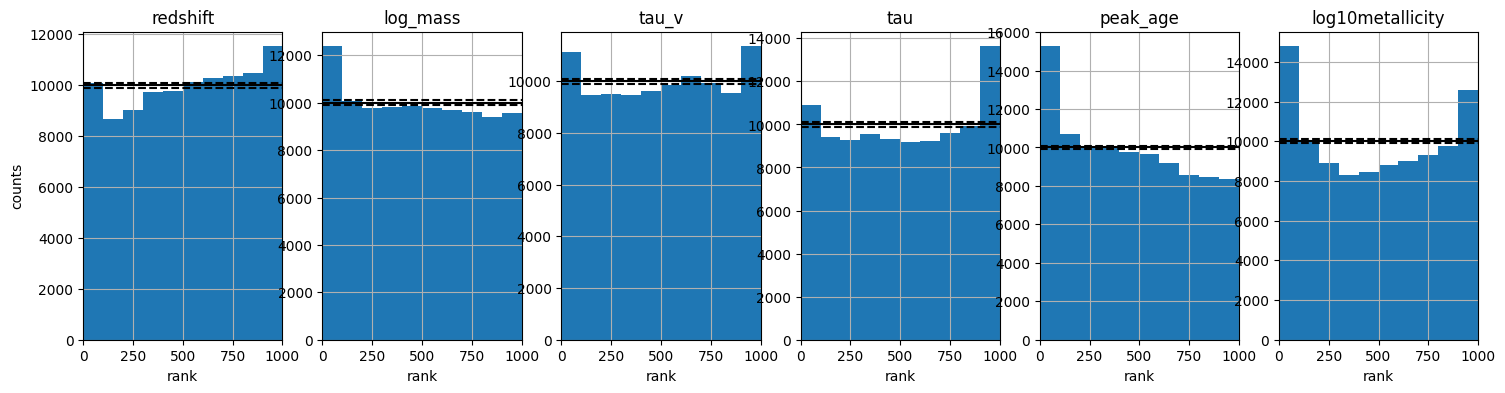

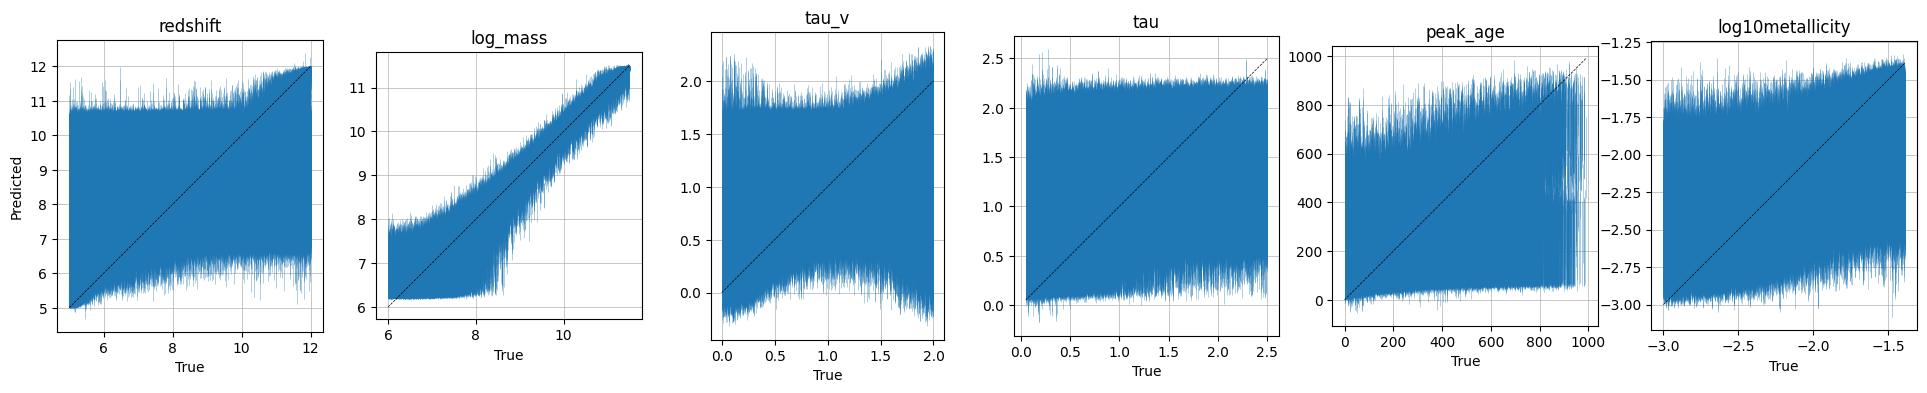

INFO:matplotlib.mathtext:Substituting symbol E from STIXNonUnicode


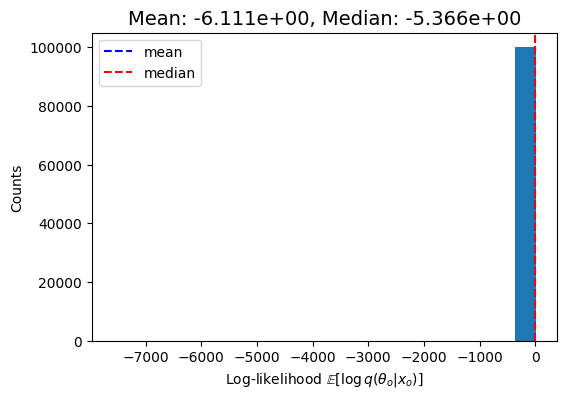

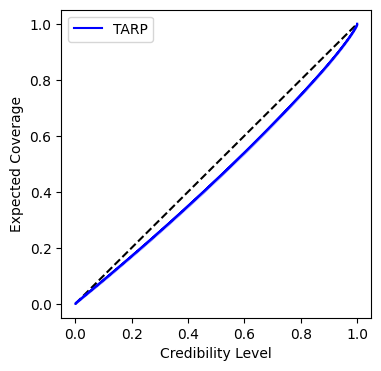

In [118]:
fitter = SBI_Fitter.init_from_hdf5('Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1_ensemble_redshift_nonorm_sbi_noisy', 
                                grid_path, return_output=False)

from unyt import Jy
depths = 10**((np.array([30] * 20)-8.90)/-2.5) * Jy # 30 AB mag in all 22 filters
fitter.create_feature_array_from_raw_photometry(extra_features=[],
                                                normalize_method=None, 
                                                scatter_fluxes=5, 
                                                include_errors_in_feature_array=True,
                                                depths=depths)

fitter.run_single_sbi(n_nets=1,
                    backend='sbi',
                    engine='NPE', 
                    stop_after_epochs=20, 
                    hidden_features=[75],
                    learning_rate=1e-3,
                    num_transforms=[3],
                    model_type=['maf'])

In [209]:
from synthesizer.parametric import SFH
from unyt import unyt_quantity, Msun, Angstrom, nJy
sfh= {'tau': np.float32(1.1300783), 'peak_age': unyt_quantity(547.21136, dtype=np.float32, units='Myr'), 'max_age': unyt_quantity(546.58285752, 'Myr'), 'min_age': unyt_quantity(0, 'yr')}
#sfh= {'tau': np.float32(1.1300783), 'peak_age': unyt_quantity(547.21136, dtype=np.float32, units='Myr'), 'max_age': unyt_quantity(846.58285752, 'Myr'), 'min_age': unyt_quantity(0, 'yr')}


sfh = SFH.LogNormal(**sfh)

#t, sfh = sfh.calculate_sfh()

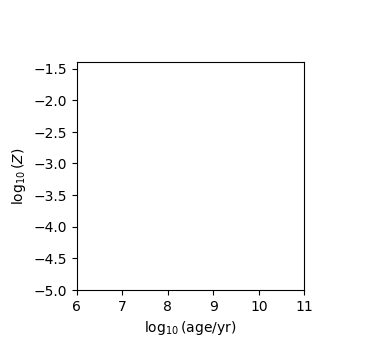

(<Figure size 350x350 with 3 Axes>,
 <Axes: xlabel='$\\log_{10}(\\mathrm{age}/\\mathrm{yr})$', ylabel='$\\log_{10}(Z)$'>)

In [210]:
from synthesizer.parametric import Galaxy
from synthesizer.emission_models import PacmanEmission, TotalEmission, EmissionModel, IntrinsicEmission, StellarEmissionModel, STELLAR_MODELS, IncidentEmission
from synthesizer.emission_models.attenuation import PowerLaw,  Calzetti2000
from synthesizer.emissions import plot_spectra
from synthesizer.emission_models.dust.emission import Greybody
from synthesizer.grid import Grid
from synthesizer.parametric import SFH, Stars, ZDist

galaxy = Galaxy(
    redshift=10,
    stars = Stars(
        grid.log10age,
        grid.metallicity,
        sf_hist = sfh,
        initial_mass = 1e7 * Msun,
        metal_dist = ZDist.DeltaConstant(log10metallicity=2e-2),
        tau_v=0,
    ),
)

galaxy.stars.plot_sfzh()

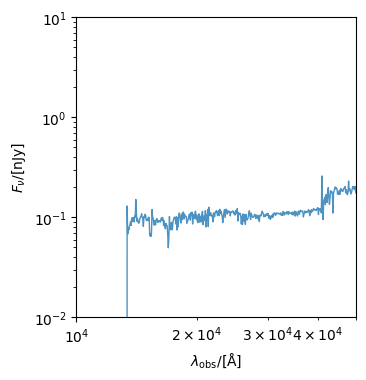

(<Figure size 350x500 with 1 Axes>,
 <Axes: xlabel='$\\lambda_\\mathrm{obs}/[\\mathrm{\\AA}]$', ylabel='$F_{\\nu}/[\\mathrm{\\rm{nJy}}]$'>)

In [207]:

galaxy.stars.get_spectra(emission_model)    

galaxy.get_observed_spectra(cosmo=Planck18)

plot_spectra(
    galaxy.stars.spectra['total'],
    quantity_to_plot='fnu',
    show=True,
   xlimits=(10000, 50_000)*Angstrom,
    ylimits=(0.01, 10)*nJy,
)

In [194]:
galaxy.stars.spectra['total'].fnu

unyt_array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       9.66202085e+39, 9.59611655e+39, 9.53220035e+39], shape=(9244,), units='nJy')

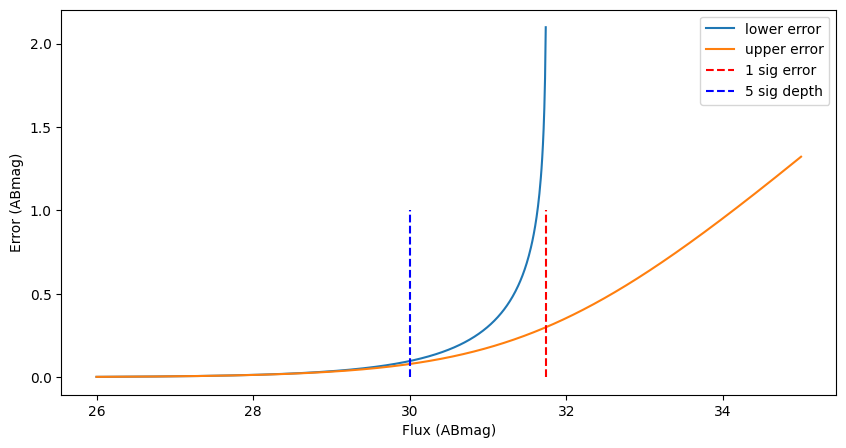

In [261]:
d_njy = depths.to(nJy).value[0]/5

import astropy.units as u

d = d_njy * u.nJy

test_fluxes = np.linspace(26, 35, 1000) * u.ABmag

mag_err_lower = lambda x: np.log10(x.to(u.nJy).value/(x.to(u.nJy).value-d.to(u.nJy).value))
mag_err_upper = lambda x: np.log10(1 + np.abs(d.to(u.nJy).value/x.to(u.nJy).value))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(test_fluxes, mag_err_lower(test_fluxes), label='lower error')
ax.plot(test_fluxes, mag_err_upper(test_fluxes), label='upper error')
ax.set_xlabel('Flux (ABmag)')
ax.set_ylabel('Error (ABmag)')
ax.vlines(d.to(u.ABmag).value, 0, 1, color='red', linestyle='--', label='1 sig error')
ax.vlines((5*d).to(u.ABmag).value, 0, 1, color='blue', linestyle='--', label='5 sig depth')
ax.legend()


In [265]:
mag_err_upper(30*u.ABmag)

np.float64(0.07918124604762482)